# Deep Autoencoder in Keras (CIFAR-10)

In [9]:
%pylab inline
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.layers.core import Reshape
from keras.datasets import cifar10
from keras.utils.vis_utils import model_to_dot

from tempfile import NamedTemporaryFile

from IPython.display import SVG, Image
import matplotlib.pyplot as plt

import shutil
import os

Populating the interactive namespace from numpy and matplotlib


## Data

In [10]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x.astype('float32')/255.
train_y = train_y.astype('float32')

# Only specific Category
train_x = train_x[(train_y == 1).reshape(50000)]
test_x = test_x[(test_y == 1).reshape(10000)]

Untaring file...


(5000, 32, 32, 3)


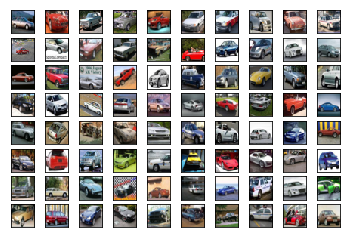

In [11]:
def display(images, size=80):
    for i in range(size):
        ax = subplot(size/10, 10, i+1)
        ax.imshow(images[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

print(train_x.shape)
display(train_x[:80])

## Deep Autoencoder Model

/usr/local/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", name="EncoderLayer1", units=2048)`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", name="EncoderLayer2", units=1024)`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", name="EncoderLayer3", units=512)`
  '` call to the Keras 2 API: ' + signature)
/usr/local/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("In..., outputs=Tensor("Ou...)`
  '` call to the Keras 2 API: ' + signature)


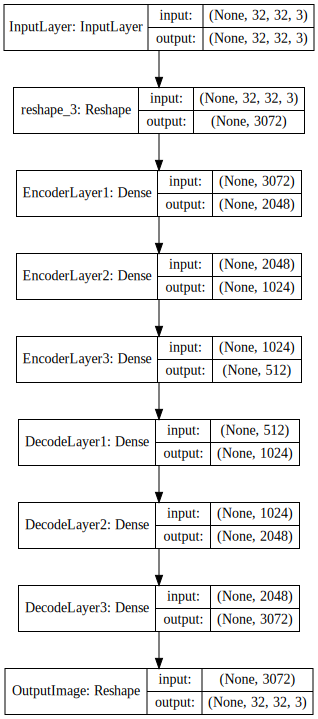

In [25]:
layer1_dim = 2048
layer2_dim = 1024
layer3_dim = 512

input_img = Input(shape=(32,32, 3), name='InputLayer')
reshaped_img = Reshape((3072,))(input_img)
encoder1 = Dense(output_dim=layer1_dim, activation='relu', name='EncoderLayer1')(reshaped_img)
encoder2 = Dense(output_dim=layer2_dim, activation='relu', name='EncoderLayer2')(encoder1)
encoder3 = Dense(output_dim=layer3_dim, activation='relu', name='EncoderLayer3')(encoder2)

decoder1 = Dense(layer2_dim, activation='sigmoid', name='DecodeLayer1')(encoder3)
decoder2 = Dense(layer1_dim, activation='sigmoid', name='DecodeLayer2')(decoder1)
decoder3 = Dense(3072, activation='sigmoid', name='DecodeLayer3')(decoder2)
output_img = Reshape((32, 32, 3), name='OutputImage')(decoder3)


# Input -> Recontruction
autoencoder = Model(input=input_img, output=output_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# # Visualization
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

## Deep Encoder Model

/usr/local/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="Input2", inputs=Tensor("In..., outputs=Tensor("En...)`
  '` call to the Keras 2 API: ' + signature)


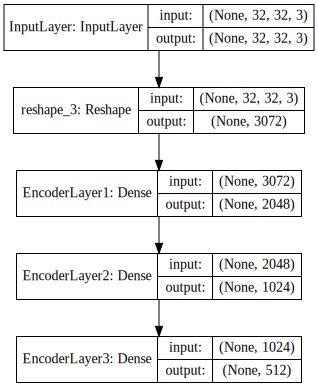

In [26]:
# Input Image -> Encoded 
encoder = Model(input=input_img, output=encoder3, name='Input2')
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

## Deep Decoder Model

/usr/local/lib/python3.6/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("In..., outputs=Tensor("Ou...)`
  '` call to the Keras 2 API: ' + signature)


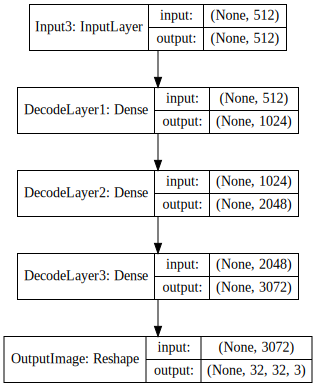

In [27]:
encoder_input = Input(shape=(layer3_dim,), name='Input3')
decoded_layer = autoencoder.layers[-4](encoder_input)
decoded_layer = autoencoder.layers[-3](decoded_layer)
decoded_layer = autoencoder.layers[-2](decoded_layer)
decoded_layer = autoencoder.layers[-1](decoded_layer)

decoder = Model(input=encoder_input, output=decoded_layer)
SVG(model_to_dot(decoder, show_shapes=True).create(prog='dot', format='svg'))

## Training

In [31]:
autoencoder.fit(train_x, train_x, 
                nb_epoch=100, 
                batch_size=256, 
                shuffle=True,
                validation_data=(test_x, test_x), 
                verbose=2)

/usr/local/lib/python3.6/site-packages/keras/engine/training.py:1393: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 5000 samples, validate on 1000 samples
Epoch 1/100
3s - loss: 0.0179 - val_loss: 18190.5246
Epoch 2/100
3s - loss: 0.0177 - val_loss: 18189.6950
Epoch 3/100
3s - loss: 0.0180 - val_loss: 18191.9210
Epoch 4/100
3s - loss: 0.0175 - val_loss: 18192.0525
Epoch 5/100
3s - loss: 0.0173 - val_loss: 18192.4643
Epoch 6/100
3s - loss: 0.0173 - val_loss: 18190.6327
Epoch 7/100
3s - loss: 0.0174 - val_loss: 18191.7300
Epoch 8/100
3s - loss: 0.0172 - val_loss: 18191.9735
Epoch 9/100
3s - loss: 0.0170 - val_loss: 18191.6755
Epoch 10/100
3s - loss: 0.0169 - val_loss: 18192.6965
Epoch 11/100
3s - loss: 0.0168 - val_loss: 18193.1927
Epoch 12/100
4s - loss: 0.0167 - val_loss: 18192.7761
Epoch 13/100
3s - loss: 0.0166 - val_loss: 18193.6722
Epoch 14/100
3s - loss: 0.0163 - val_loss: 18191.5243
Epoch 15/100
3s - loss: 0.0165 - val_loss: 18189.9996
Epoch 16/100
4s - loss: 0.0164 - val_loss: 18193.0552
Epoch 17/100
3s - loss: 0.0161 - val_loss: 18193.6551
Epoch 18/100
3s - loss: 0.0161 - val_loss: 

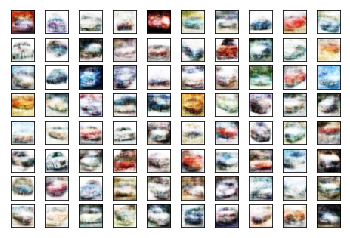

In [32]:
encoded_images = encoder.predict(test_x)
decoded_images = decoder.predict(encoded_images)
display(decoded_images)

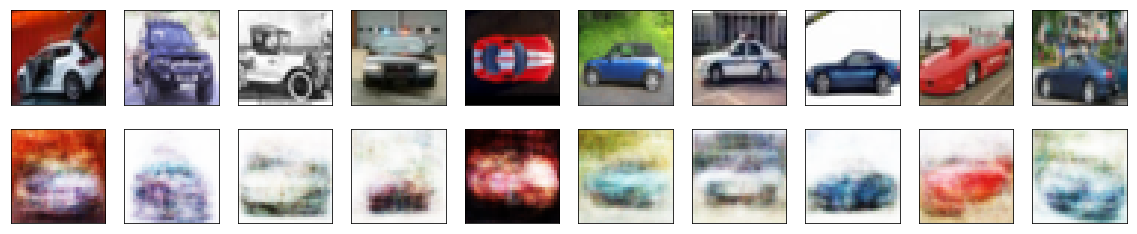

In [33]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_x[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()